<a href="https://colab.research.google.com/github/nathon-tadeo/Intro-to-ML/blob/main/homework_2_intro_to_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

URL = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
housing = pd.read_csv(URL)

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
housing[varlist] = housing[varlist].replace({'yes': 1, 'no': 0})
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Compute Cost Function (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

# Gradient Descent function
def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations):
    m_train = len(y_train)
    m_val = len(y_val)
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)

    for i in range(iterations):
        # Predictions for the training set
        predictions_train = X_train.dot(theta)
        errors = np.subtract(predictions_train, y_train)
        sum_delta = (learning_rate / m_train) * X_train.transpose().dot(errors)
        theta -= sum_delta

        # Compute training and validation losses
        training_loss_history[i] = compute_cost(X_train, y_train, theta)
        validation_loss_history[i] = compute_cost(X_val, y_val, theta)

    return theta, training_loss_history, validation_loss_history

<ipython-input-525-524dc709a8b4>:6: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
<ipython-input-525-524dc709a8b4>:22: RuntimeWarning: invalid value encountered in subtract
  theta -= sum_delta


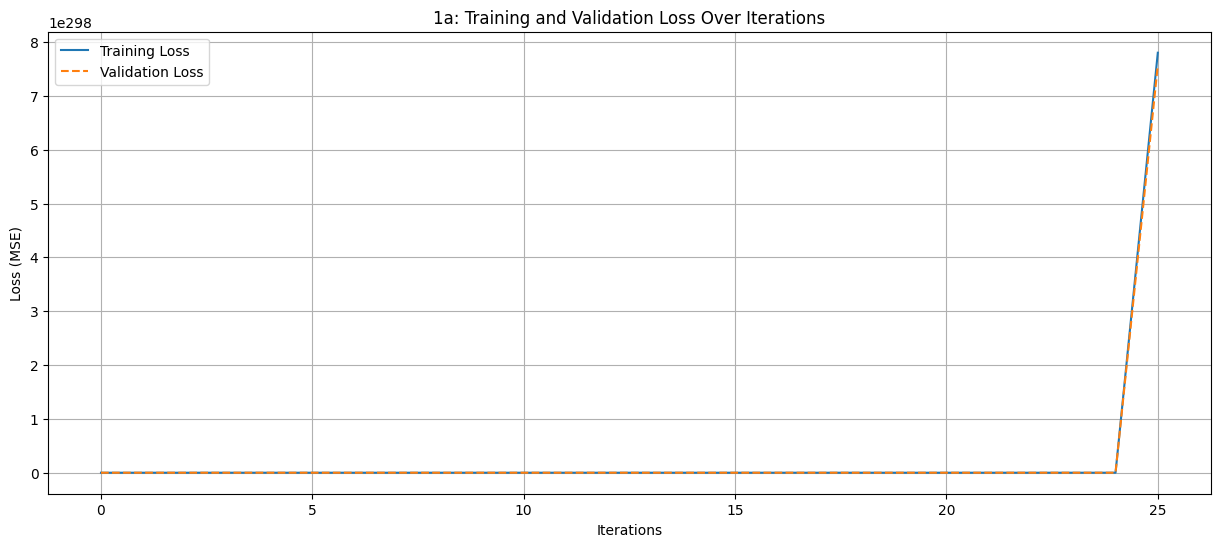

In [ ]:
#Problem 1a
# Split data into features (X) and target (y)
x1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = housing['price'].values

# Add bias term, reshape, stack
X = np.hstack([np.ones((x1.shape[0], 1)), x1])

# Split data into training (80%) and validation (20%)
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Initialize theta (parameters) to zeros
theta = np.zeros(X_train.shape[1])

learning_rate = 0.01
iterations = 1000

# Model with gradient decent
theta, training_loss_history, validation_loss_history = gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations)

#Plot the training and validation loss
plt.figure(figsize=(15, 6))
plt.plot(range(iterations), training_loss_history, label='Training Loss')
plt.plot(range(iterations), validation_loss_history, label='Validation Loss', linestyle='--')
plt.title('1a: Training and Validation Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()



<ipython-input-525-524dc709a8b4>:6: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
<ipython-input-525-524dc709a8b4>:22: RuntimeWarning: invalid value encountered in subtract
  theta -= sum_delta


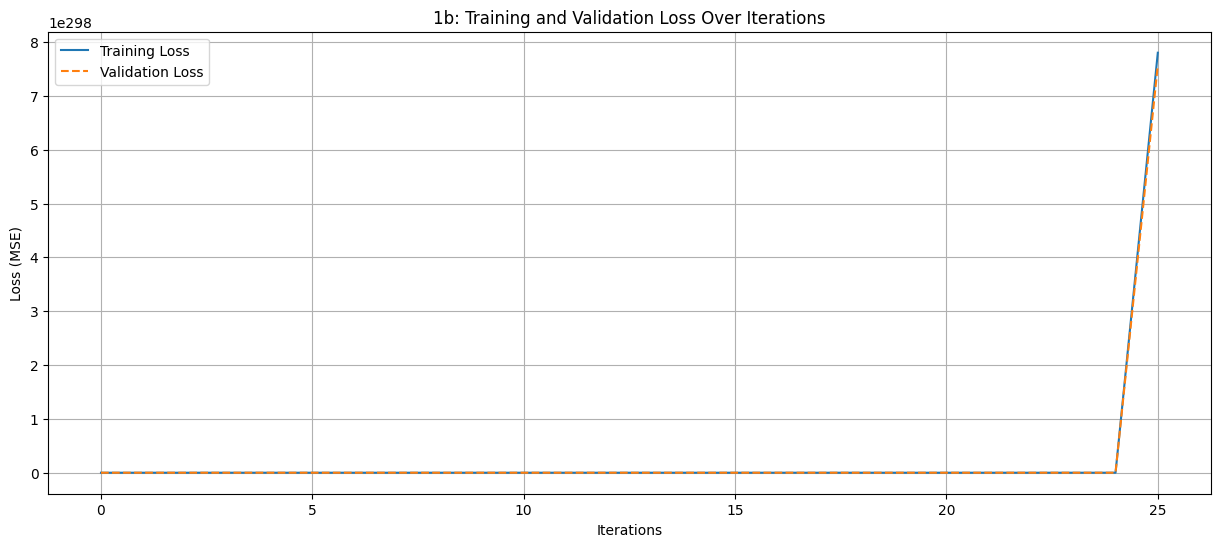

In [ ]:
# Problem 1b
x2 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = housing['price'].values

# Add bias term, reshape, stack
X = np.hstack([np.ones((x2.shape[0], 1)), x2])

# Split data into training (80%) and validation (20%)
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Initialize theta (parameters) to zeros
theta = np.zeros(X_train.shape[1])

learning_rate = 0.01
iterations = 1000

# Model with gradient decent
theta, training_loss_history, validation_loss_history = gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations)

#Plot the training and validation loss
plt.figure(figsize=(15, 6))
plt.plot(range(iterations), training_loss_history, label='Training Loss')
plt.plot(range(iterations), validation_loss_history, label='Validation Loss', linestyle='--')
plt.title('1b: Training and Validation Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def normalize_data(X_train, X_val):
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    scaler = MinMaxScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_val_norm = scaler.transform(X_val)
    return X_train_norm, X_val_norm

def standardize_data(X_train, X_val):
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_val_std = scaler.transform(X_val)
    return X_train_std, X_val_std

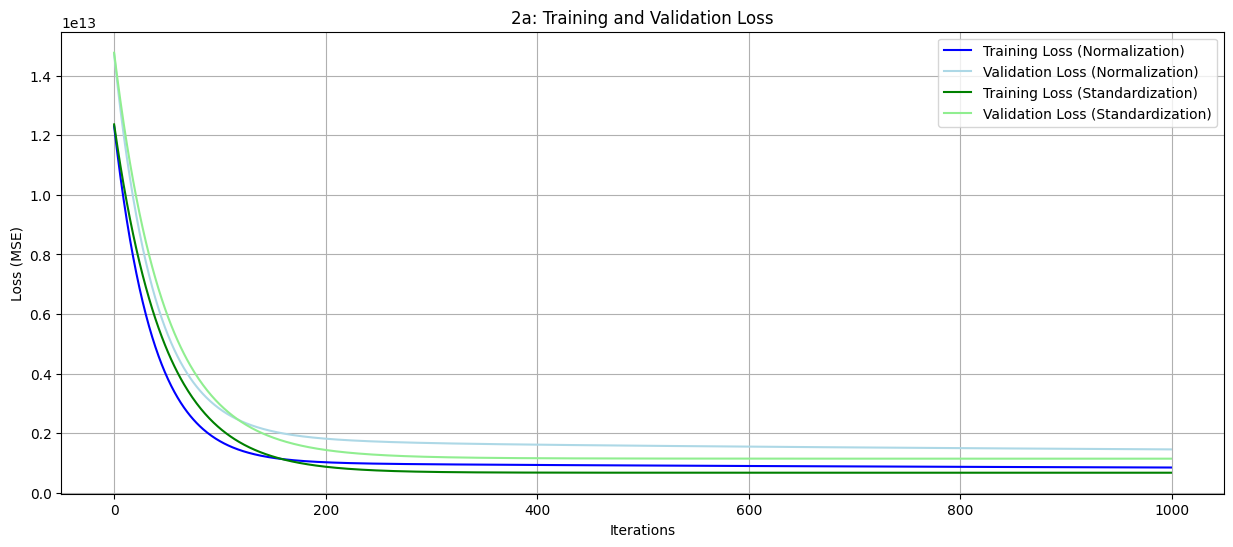

In [ ]:
# Problem 2a
# Split data into features (X) and target (y)
x1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = housing['price'].values

# Add bias term (intercept column of ones)
X = np.hstack([np.ones((x1.shape[0], 1)), x1])

# Split data into training (80%) and validation (20%)
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Normalize and standardize data
X_train_norm, X_val_norm = normalize_data(X_train, X_val)
X_train_std, X_val_std = standardize_data(X_train, X_val)

# Add bias (intercept term) to the features (optional but common in linear regression)
X_train_norm = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_val_norm = np.hstack([np.ones((X_val_norm.shape[0], 1)), X_val_norm])

X_train_std = np.hstack([np.ones((X_train_std.shape[0], 1)), X_train_std])
X_val_std = np.hstack([np.ones((X_val_std.shape[0], 1)), X_val_std])

# Training configuration
learning_rate = 0.01
iterations = 1000

# Initialize theta (parameters) to zeros for both cases
theta_norm = np.zeros(X_train_norm.shape[1])
theta_std = np.zeros(X_train_std.shape[1])

# Perform gradient descent for normalization & standardization
theta_norm, train_losses_norm, val_losses_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, theta_norm, learning_rate, iterations)
theta_std, train_losses_std, val_losses_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, theta_std, learning_rate, iterations)

# Plot training and validation losses for both normalization and standardization
plt.figure(figsize=(15, 6))
plt.plot(train_losses_norm, label='Training Loss (Normalization)', color='blue')
plt.plot(val_losses_norm, label='Validation Loss (Normalization)', color='lightblue')
plt.plot(train_losses_std, label='Training Loss (Standardization)', color='green')
plt.plot(val_losses_std, label='Validation Loss (Standardization)', color='lightgreen')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('2a: Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


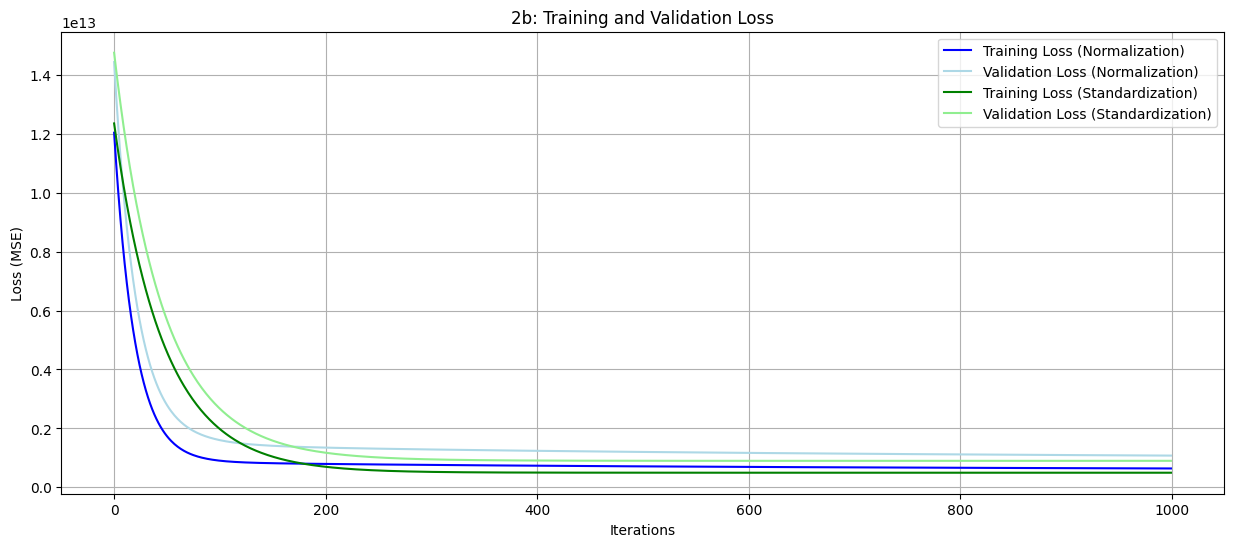

In [ ]:
#Problem 2b
x2 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = housing['price'].values

# Add bias term, reshape, stack
X = np.hstack([np.ones((x2.shape[0], 1)), x2])

# Split data into training (80%) and validation (20%)
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Normalize and standardize data
X_train_norm, X_val_norm = normalize_data(X_train, X_val)
X_train_std, X_val_std = standardize_data(X_train, X_val)

# Add bias (intercept term) to the features (optional but common in linear regression)
X_train_norm = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_val_norm = np.hstack([np.ones((X_val_norm.shape[0], 1)), X_val_norm])

X_train_std = np.hstack([np.ones((X_train_std.shape[0], 1)), X_train_std])
X_val_std = np.hstack([np.ones((X_val_std.shape[0], 1)), X_val_std])

# Training configuration
learning_rate = 0.01
iterations = 1000

# Initialize theta (parameters) to zeros for both cases
theta_norm = np.zeros(X_train_norm.shape[1])
theta_std = np.zeros(X_train_std.shape[1])

# Perform gradient descent for normalization
theta_norm, train_losses_norm, val_losses_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, theta_norm, learning_rate, iterations)

# Perform gradient descent for standardization
theta_std, train_losses_std, val_losses_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, theta_std, learning_rate, iterations)

# Plot training and validation losses for both normalization and standardization
plt.figure(figsize=(15, 6))
plt.plot(train_losses_norm, label='Training Loss (Normalization)', color='blue')
plt.plot(val_losses_norm, label='Validation Loss (Normalization)', color='lightblue')
plt.plot(train_losses_std, label='Training Loss (Standardization)', color='green')
plt.plot(val_losses_std, label='Validation Loss (Standardization)', color='lightgreen')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('2b: Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Compute Cost Function with penalty
def compute_cost_with_penalty(X, y, theta, lambda_):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)

    # Regularization term (excluding the bias term theta[0])
    penalty = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    J = 1 / (2 * m) * np.sum(sqrErrors) + penalty
    return J

# Gradient Descent with penalty
def gradient_descent_with_penalty(X_train, y_train, X_val, y_val, theta, learning_rate, iterations, lambda_):
    m_train = len(y_train)
    m_val = len(y_val)
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)

    for it in range(iterations):
        # Predictions for the training set
        predictions_train = X_train.dot(theta)

        # Gradient descent update rule with regularization (excluding the bias term)
        theta[0] = theta[0] - (1 / m_train) * learning_rate * (X_train[:, 0].dot(predictions_train - y_train))
        theta[1:] = theta[1:] - (1 / m_train) * learning_rate * ((X_train[:, 1:].T.dot(predictions_train - y_train)) + (lambda_ * theta[1:]))

        # Compute training and validation losses with penalty for training set only
        training_loss_history[it] = compute_cost_with_penalty(X_train, y_train, theta, lambda_)
        validation_loss_history[it] = compute_cost(X_val, y_val, theta)  # No regularization for validation loss

    return theta, training_loss_history, validation_loss_history

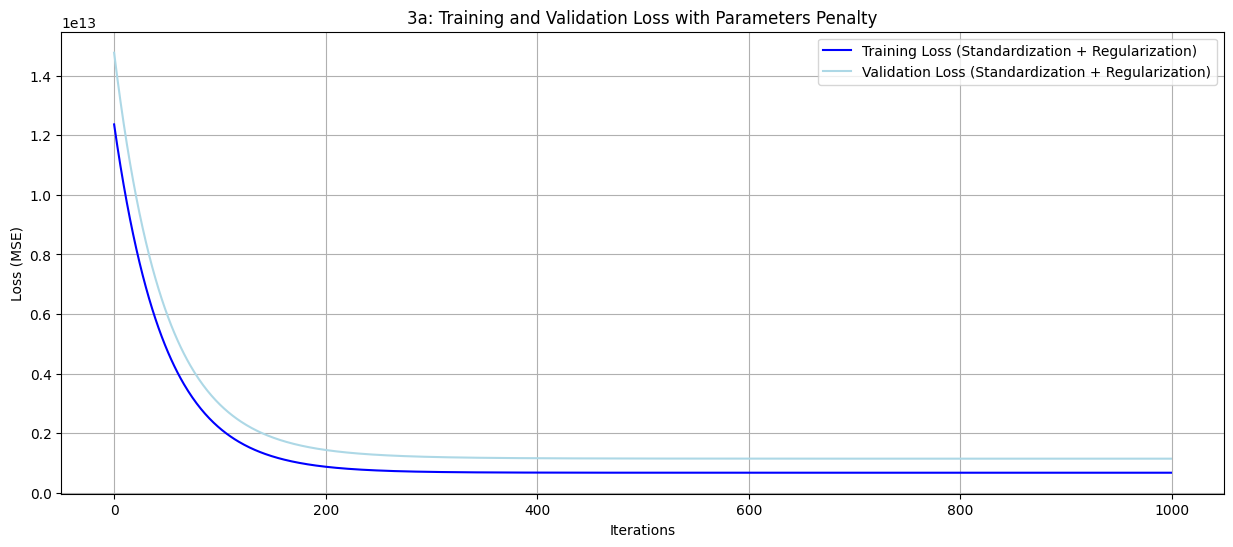

In [ ]:
#Problem 3a
# Split data into features (X) and target (y)
x1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = housing['price'].values

# Add bias term, reshape, stack
X = np.hstack([np.ones((x1.shape[0], 1)), x1])

# Split data into training (80%) and validation (20%)
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Define regularization parameter (lambda)
lambda_ = 0.1

# Normalize and standardize data
X_train_norm, X_val_norm = normalize_data(X_train, X_val)
X_train_std, X_val_std = standardize_data(X_train, X_val)

# Add bias (intercept term) to the features (optional but common in linear regression)
X_train_norm = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_val_norm = np.hstack([np.ones((X_val_norm.shape[0], 1)), X_val_norm])

X_train_std = np.hstack([np.ones((X_train_std.shape[0], 1)), X_train_std])
X_val_std = np.hstack([np.ones((X_val_std.shape[0], 1)), X_val_std])

# Training configuration
learning_rate = 0.01
iterations = 1000

# Initialize theta for training with regularization
theta_std_reg = np.zeros(X_train_std.shape[1])

# Train using gradient descent with regularization
theta_std_reg, train_loss_std_reg, val_loss_std_reg = gradient_descent_with_penalty(
    X_train_std, y_train, X_val_std, y_val, theta_std_reg, learning_rate, iterations, lambda_
)

plt.figure(figsize=(15, 6))
plt.plot(range(iterations), train_loss_std_reg, label='Training Loss (Standardization + Regularization)', color='blue')
plt.plot(range(iterations), val_loss_std_reg, label='Validation Loss (Standardization + Regularization)', color='lightblue')
plt.title('3a: Training and Validation Loss with Parameters Penalty')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

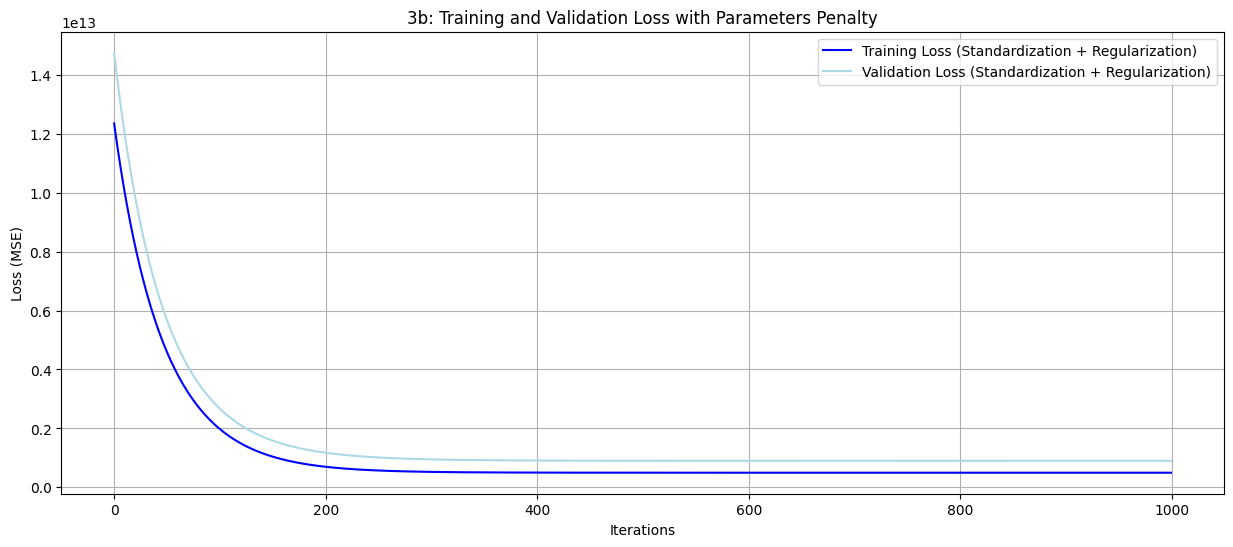

In [ ]:
#Problem 3b
x2 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = housing['price'].values

# Add bias term, reshape, stack
X = np.hstack([np.ones((x2.shape[0], 1)), x2])

# Split data into training (80%) and validation (20%)
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Define regularization parameter (lambda)
lambda_ = 0.1

# Normalize and standardize data
X_train_norm, X_val_norm = normalize_data(X_train, X_val)
X_train_std, X_val_std = standardize_data(X_train, X_val)

# Add bias term, reshape, stack
X_train_norm = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_val_norm = np.hstack([np.ones((X_val_norm.shape[0], 1)), X_val_norm])

X_train_std = np.hstack([np.ones((X_train_std.shape[0], 1)), X_train_std])
X_val_std = np.hstack([np.ones((X_val_std.shape[0], 1)), X_val_std])

# Training configuration
learning_rate = 0.01
iterations = 1000

# Initialize theta for training with regularization
theta_std_reg = np.zeros(X_train_std.shape[1])

# Train using gradient descent with regularization
theta_std_reg, train_loss_std_reg, val_loss_std_reg = gradient_descent_with_penalty(X_train_std, y_train, X_val_std, y_val, theta_std_reg, learning_rate, iterations, lambda_)

plt.figure(figsize=(15, 6))
plt.plot(range(iterations), train_loss_std_reg, label='Training Loss (Standardization + Regularization)', color='blue')
plt.plot(range(iterations), val_loss_std_reg, label='Validation Loss (Standardization + Regularization)', color='lightblue')
plt.title('3b: Training and Validation Loss with Parameters Penalty')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()